#2. 데이터 확인

In [1]:
import pandas as pd

movies = [
  ['user1', '연평대전', 5],
  ['user1', '7번방의 선물', 4],
  ['user1', '국제시장', 4],
  ['user2', '연평대전', 5],
  ['user2', '7번방의 선물', 3],
  ['user2', '국제시장', 4],
  ['user2', '명랑', 5],
  ['user2', '국가대표', 3],
  # ['user3', '연평대전', 4],
  ['user3', '7번방의 선물', 3],
  # ['user3', '국제시장', 3],
  ['user3', '명랑', 3],
  ['user3', '국가대표', 5]
]

df_movies = pd.DataFrame(movies, columns=['userID', 'movieName', 'Rating'])
df_movies

,userID,movieName,Rating
0,user1,연평대전,5
1,user1,7번방의 선물,4
2,user1,국제시장,4
3,user2,연평대전,5
4,user2,7번방의 선물,3
5,user2,국제시장,4
6,user2,명랑,5
7,user2,국가대표,3
8,user3,7번방의 선물,3
9,user3,명랑,3


#3. 데이터 가공 및 변환
> 아래와 같이 나올 수 있도록 코드를 수정하시오

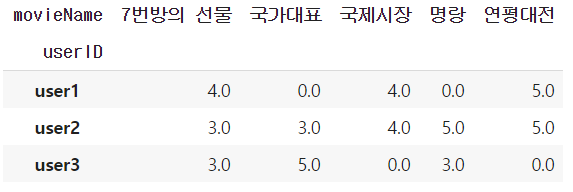

##3.1 데이터 가공

In [2]:
df_rating_moves = df_movies.pivot_table('Rating', index='userID', columns='movieName')
df_rating_moves

movieName,7번방의 선물,국가대표,국제시장,명랑,연평대전
userID,,,,,
user1,4.0,NaN,4.0,NaN,5.0
user2,3.0,3.0,4.0,5.0,5.0
user3,3.0,5.0,NaN,3.0,NaN


##3.2 데이터 변환

In [3]:
df_rating_moves = df_rating_moves.fillna(0)
df_rating_moves

movieName,7번방의 선물,국가대표,국제시장,명랑,연평대전
userID,,,,,
user1,4.0,0.0,4.0,0.0,5.0
user2,3.0,3.0,4.0,5.0,5.0
user3,3.0,5.0,0.0,3.0,0.0


#4. 영화간 유사도 산출

##4.1 사용자 기반 추천

In [4]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(df_rating_moves, df_rating_moves)
user_similarity

array([[1.        , 0.76594714, 0.24238715],
       [0.76594714, 1.        , 0.64891937],
       [0.24238715, 0.64891937, 1.        ]])

In [5]:
df_user_based = pd.DataFrame(data=user_similarity, index=df_rating_moves.index, columns=df_rating_moves.index)
df_user_based

userID,user1,user2,user3
userID,,,
user1,1.000000,0.765947,0.242387
user2,0.765947,1.000000,0.648919
user3,0.242387,0.648919,1.000000


> 사용자별 유사도를 확인하기 위해 간단하게 data frame으로 변환시켰다.

In [6]:
df_user_based['user1'].sort_values(ascending=False)

userID
user1    1.000000
user2    0.765947
user3    0.242387
Name: user1, dtype: float64

> user1과 유사도가 가장 높은 사용자는 user2임을 알 수 있다.

In [7]:
df_rating_moves.loc['user2'].sort_values(ascending=False)

movieName
연평대전       5.0
명랑         5.0
국제시장       4.0
국가대표       3.0
7번방의 선물    3.0
Name: user2, dtype: float64

> user1에서 추천하기 위해 user2이 본 영화를 내림차순으로 정렬하였다. 이 목록을 보고 user1에서 영화를 추천하면 된다.

##4.2 Quiz
> user3에게 영화를 추천해 주세요

In [8]:
def UserBasedRecommand(data_frame, user_id):
  user_sim = cosine_similarity(data_frame, data_frame)
  df_user_based = pd.DataFrame(data=user_sim, index=data_frame.index, columns=data_frame.index)
  user_sorted = df_user_based[user_id].sort_values(ascending=False)
  print(user_sorted)
  print(user_sorted[1])
  print(user_sorted.index)
  print(user_sorted.index[1])
  return data_frame.loc[user_sorted.index[1]].sort_values(ascending=False)

UserBasedRecommand(df_rating_moves, 'user3')

userID
user3    1.000000
user2    0.648919
user1    0.242387
Name: user3, dtype: float64
0.6489193674987288
Index(['user3', 'user2', 'user1'], dtype='object', name='userID')
user2


movieName
연평대전       5.0
명랑         5.0
국제시장       4.0
국가대표       3.0
7번방의 선물    3.0
Name: user2, dtype: float64

##4.3 안본 영화 추천받기

In [9]:
df_rating_moves_T = df_rating_moves.transpose()
df_rating_moves_T

userID,user1,user2,user3
movieName,,,
7번방의 선물,4.0,3.0,3.0
국가대표,0.0,3.0,5.0
국제시장,4.0,4.0,0.0
명랑,0.0,5.0,3.0
연평대전,5.0,5.0,0.0


>transpose 함수는 행과 열을 치환하는 기능을 한다.

In [10]:
df_nonmovies = df_rating_moves_T[df_rating_moves_T['user1']==0]
df_nonmovies

userID,user1,user2,user3
movieName,,,
국가대표,0.0,3.0,5.0
명랑,0.0,5.0,3.0


> user1이 안본 영화 목록을 만들었다.

In [11]:
df_nonmovies['user2'].sort_values(ascending=False)

movieName
명랑      5.0
국가대표    3.0
Name: user2, dtype: float64

> user1이 안본 영화 중 user2가 높게 평가한 영화를 먼저 추천하였다.

##4.4 Quiz
> 위 코드를 이용하여 user3가 안본 영화를 추천하시오

In [12]:
def UserBasedRecommand(data_frame, user_id):
  user_sim = cosine_similarity(data_frame, data_frame)
  df_user_based = pd.DataFrame(data=user_sim, index=data_frame.index, columns=data_frame.index)
  user_sorted = df_user_based[user_id].sort_values(ascending=False)
  
  data_frame_T = data_frame.transpose()
  df_nonviews = data_frame_T[data_frame_T[user_id]==0]
  # print(df_nonviews)
  # return df_nonviews.loc[user_sorted.index[1]].sort_values(ascending=False)
  return df_nonviews[user_sorted.index[1]].sort_values(ascending=False)

UserBasedRecommand(df_rating_moves, 'user3')

movieName
연평대전    5.0
국제시장    4.0
Name: user2, dtype: float64

##4.5 아이템 기반 추천

In [13]:
df_rating_moves_T = df_rating_moves.transpose()
df_rating_moves_T

userID,user1,user2,user3
movieName,,,
7번방의 선물,4.0,3.0,3.0
국가대표,0.0,3.0,5.0
국제시장,4.0,4.0,0.0
명랑,0.0,5.0,3.0
연평대전,5.0,5.0,0.0


> 아이템 기반으로 분석할 것이므로 transpose를 이용하여 행과 열을 치환한다.

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

movies_sim = cosine_similarity(df_rating_moves_T, df_rating_moves_T)
movies_sim

array([[1.        , 0.70588235, 0.84887469, 0.70588235, 0.84887469],
       [0.70588235, 1.        , 0.36380344, 0.88235294, 0.36380344],
       [0.84887469, 0.36380344, 1.        , 0.60633906, 1.        ],
       [0.70588235, 0.88235294, 0.60633906, 1.        , 0.60633906],
       [0.84887469, 0.36380344, 1.        , 0.60633906, 1.        ]])

> 각 영화간의 유사도를 구하였다.

In [15]:
item_based = pd.DataFrame(data=movies_sim, index=df_rating_moves_T.index, columns=df_rating_moves_T.index)
item_based

movieName,7번방의 선물,국가대표,국제시장,명랑,연평대전
movieName,,,,,
7번방의 선물,1.000000,0.705882,0.848875,0.705882,0.848875
국가대표,0.705882,1.000000,0.363803,0.882353,0.363803
국제시장,0.848875,0.363803,1.000000,0.606339,1.000000
명랑,0.705882,0.882353,0.606339,1.000000,0.606339
연평대전,0.848875,0.363803,1.000000,0.606339,1.000000


In [16]:
item_based['7번방의 선물'].sort_values(ascending=False)[1:]

movieName
연평대전    0.848875
국제시장    0.848875
명랑      0.705882
국가대표    0.705882
Name: 7번방의 선물, dtype: float64

> 7번방의 선물과 유사도가 높은 영화들을 추출하였다. [1:]을 통해 자기 자신은 제외시켰다.

#5. 예측 평점

In [17]:
print('사용자 평점\n', df_rating_moves.values)
print('영화별 유사도\n', movies_sim)
print('영화별 유사도\n', item_based.values)
print('내적\n', df_rating_moves.values.dot(movies_sim))
print('내적\n', df_rating_moves.values.dot(item_based.values))

사용자 평점
 [[4. 0. 4. 0. 5.]
 [3. 3. 4. 5. 5.]
 [3. 5. 0. 3. 0.]]
영화별 유사도
 [[1.         0.70588235 0.84887469 0.70588235 0.84887469]
 [0.70588235 1.         0.36380344 0.88235294 0.36380344]
 [0.84887469 0.36380344 1.         0.60633906 1.        ]
 [0.70588235 0.88235294 0.60633906 1.         0.60633906]
 [0.84887469 0.36380344 1.         0.60633906 1.        ]]
영화별 유사도
 [[1.         0.70588235 0.84887469 0.70588235 0.84887469]
 [0.70588235 1.         0.36380344 0.88235294 0.36380344]
 [0.84887469 0.36380344 1.         0.60633906 1.        ]
 [0.70588235 0.88235294 0.60633906 1.         0.60633906]
 [0.84887469 0.36380344 1.         0.60633906 1.        ]]
내적
 [[11.63987219  6.09776035 12.39549875  8.28058098 12.39549875]
 [16.28693101 12.8036427  15.66972969 15.22175745 15.66972969]
 [ 8.64705882  9.76470588  6.18465844  9.52941176  6.18465844]]
내적
 [[11.63987219  6.09776035 12.39549875  8.28058098 12.39549875]
 [16.28693101 12.8036427  15.66972969 15.22175745 15.66972969]
 [ 8.64705882

> 예측 평점을 구할 경우 분자는 '사용자 평점'과 '영화별 유사도'의 내적으로 구하게 된다.

> 사용자 평점은 df_rating_moves.values로 구할 수 있다.

> 영화별 유사도는 movies_sim 또는 item_based.values으로 구할 수 있다.

> 내적은 dot 함수를 이용하여 구할 수 있다.

In [18]:
import numpy as np

print(np.abs(movies_sim))
print(np.abs(movies_sim).sum(axis=1))
print(np.array([np.abs(movies_sim).sum(axis=1)]))

[[1.         0.70588235 0.84887469 0.70588235 0.84887469]
 [0.70588235 1.         0.36380344 0.88235294 0.36380344]
 [0.84887469 0.36380344 1.         0.60633906 1.        ]
 [0.70588235 0.88235294 0.60633906 1.         0.60633906]
 [0.84887469 0.36380344 1.         0.60633906 1.        ]]
[4.10951408 3.31584217 3.81901719 3.80091342 3.81901719]
[[4.10951408 3.31584217 3.81901719 3.80091342 3.81901719]]


> 예측평점에서 분모가 되는 부분으로 유사도에 대한 절대값의 합을 구하는 코드이다.

In [19]:
def predict_rating(rating, item_sim):
  return rating.dot(item_sim) / np.array([np.abs(item_sim).sum(axis=1)])

rating_pred = predict_rating(df_rating_moves.values, movies_sim)
rating_pred

array([[2.83242056, 1.83897786, 3.24573002, 2.17857658, 3.24573002],
       [3.9632255 , 3.86135469, 4.10307912, 4.004763  , 4.10307912],
       [2.10415603, 2.9448645 , 1.61943718, 2.50713729, 1.61943718]])

In [20]:
df_rating_moves.values

array([[4., 0., 4., 0., 5.],
       [3., 3., 4., 5., 5.],
       [3., 5., 0., 3., 0.]])

#6. 평균 제곱 오차
> 추측값에 대한 정확도를 측정하기 위해 평균 제곱 오차를 사용한다. 값이 클수록 오차가 크다고 판단할 수 있다.

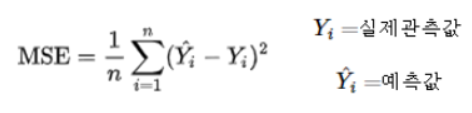

> 예측값에서 실제 값을 뺀 값의 제곱에 대한 평균으로 두 값에 대한 편차이므로 값이 크게 되면 예측값이 잘못되었다는 것을 알 수 있다.

In [21]:
print('편차 : \n', rating_pred - df_rating_moves.values)
print('편차 제곱 : \n', np.square(rating_pred - df_rating_moves.values))

편차 : 
 [[-1.16757944  1.83897786 -0.75426998  2.17857658 -1.75426998]
 [ 0.9632255   0.86135469  0.10307912 -0.995237   -0.89692088]
 [-0.89584397 -2.0551355   1.61943718 -0.49286271  1.61943718]]
편차 제곱 : 
 [[1.36324174 3.38183958 0.5689232  4.74619593 3.07746315]
 [0.92780337 0.7419319  0.01062531 0.99049668 0.80446706]
 [0.80253642 4.22358194 2.62257679 0.24291365 2.62257679]]


In [22]:
rating_square = np.square(rating_pred - df_rating_moves.values)
print(rating_square)
print(rating_square.reshape(-1).mean())
print(rating_square.flatten().mean())
print(rating_square.ravel().mean())

[[1.36324174 3.38183958 0.5689232  4.74619593 3.07746315]
 [0.92780337 0.7419319  0.01062531 0.99049668 0.80446706]
 [0.80253642 4.22358194 2.62257679 0.24291365 2.62257679]]
1.8084782338349181
1.8084782338349181
1.8084782338349181


> 위의 reshape, flatten, ravel 모두 1차원으로 변환시켜 주는 함수이다.

In [23]:
%timeit rating_square.reshape(-1).mean()
%timeit rating_square.flatten().mean()
%timeit rating_square.ravel().mean()

The slowest run took 13.96 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 7 µs per loop
The slowest run took 9.84 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 7.76 µs per loop
The slowest run took 11.88 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 6.03 µs per loop


> 각 동작 시간을 비교해 보면 ravel -> reshape -> flatten 순으로 처리되는 것을 볼 수 있다. flatten은 다른 함수와 다르게 원본을 볷하하여 사용하기 때문에 약간의 지연시간이 발생하여 느리게 나타난다.

#7. 비평가 영화 제거


In [24]:
print('원본 \n', df_rating_moves.values)
print('비평가 영화 제거 \n', df_rating_moves.values.nonzero())

원본 
 [[4. 0. 4. 0. 5.]
 [3. 3. 4. 5. 5.]
 [3. 5. 0. 3. 0.]]
비평가 영화 제거 
 (array([0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2]), array([0, 2, 4, 0, 1, 2, 3, 4, 0, 1, 3]))


> nonzero는 0이 아닌 값을 찾아주는 함수로 첫번째 결과는 0이 아닌 데이터의 갯수를 두 번째 결과는 index 정보를 갖게 된다.

In [25]:
rating_pred[df_rating_moves.values.nonzero()]

array([2.83242056, 3.24573002, 3.24573002, 3.9632255 , 3.86135469,
       4.10307912, 4.004763  , 4.10307912, 2.10415603, 2.9448645 ,
       2.50713729])

In [26]:
def get_mse1(pred, data_frame):
  rating_pred_nonzero = pred[data_frame.nonzero()]
  df_rating_nonzero = data_frame[data_frame.nonzero()]

  square = np.square(rating_pred_nonzero - df_rating_nonzero)
  return square.mean()

get_mse1(rating_pred, df_rating_moves.values)

1.250362218706176

In [27]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, data_frame):
  rating_pred_nonzero = pred[data_frame.nonzero()]
  df_rating_nonzero = data_frame[data_frame.nonzero()]

  # square = np.square(rating_pred_nonzero - df_rating_nonzero)
  # return square.mean()
  return mean_squared_error(rating_pred_nonzero, df_rating_nonzero)

get_mse(rating_pred, df_rating_moves.values)

1.250362218706176

#8. 상위 데이터 추천

In [28]:
ratings_arr = df_rating_moves.values
ratings_arr

array([[4., 0., 4., 0., 5.],
       [3., 3., 4., 5., 5.],
       [3., 5., 0., 3., 0.]])

In [29]:
#0번째 행의 모든 값 출력
print( np.argsort(ratings_arr[0, :]) )
print( np.argsort(ratings_arr[0, :])[:] )

#0번째 행의 4번째 값까지 출력
print( np.argsort(ratings_arr[0, :])[:4] )
#0번째 행의 뒤에서 1번째 값까지 출력
print( np.argsort(ratings_arr[0, :])[:-1] )

#0번째 행의 뒤에서 4번째 값까지 출력
print( np.argsort(ratings_arr[0, :])[:-4] )
#0번째 행의 1번째 값까지 출력
print( np.argsort(ratings_arr[0, :])[:1] )

#0번째 행의 뒤에서 4번째 값을 역순으로 출력하게 되어 뒤의 3개의 값이 나옴
#아래의 코드는 상위 3개의 데이터만 추출하는 코드로 가장 아래 코드를 사용하면 됨
print( np.argsort(ratings_arr[0, :])[:-4:-1] )
print( np.argsort(ratings_arr[0, :])[:1:-1] )

print( np.argsort(ratings_arr[0, :])[::-1] )
print( np.argsort(ratings_arr[0, :])[::-1][:3] )

[1 3 0 2 4]
[1 3 0 2 4]
[1 3 0 2]
[1 3 0 2]
[1]
[1]
[4 2 0]
[4 2 0]
[4 2 0 3 1]
[4 2 0]


In [30]:
n=3

top_n_item = np.argsort(ratings_arr[0, :])[::-1][:n]
print( top_n_item )
print( ratings_arr[0, :] ) 
print( ratings_arr[0, :][top_n_item] ) 

[4 2 0]
[4. 0. 4. 0. 5.]
[5. 4. 4.]


> argsort는 정렬한 결과를 index 정보로 반환하는 것으로 위의 코드에서는 내림차순으로 정렬한 후 n개의 값, 즉 3개의 값을 추출하게 된다.

> 이 index 정보를 이용하여 ratings_arr에 있는 top3 데이터들을 얻을 수 있다.

In [31]:
print( ratings_arr.shape )

pred = np.zeros(ratings_arr.shape)
print(pred)

(3, 5)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [32]:
df_rating_moves

movieName,7번방의 선물,국가대표,국제시장,명랑,연평대전
userID,,,,,
user1,4.0,0.0,4.0,0.0,5.0
user2,3.0,3.0,4.0,5.0,5.0
user3,3.0,5.0,0.0,3.0,0.0


In [33]:
item_sim = item_based.values
item_sim

array([[1.        , 0.70588235, 0.84887469, 0.70588235, 0.84887469],
       [0.70588235, 1.        , 0.36380344, 0.88235294, 0.36380344],
       [0.84887469, 0.36380344, 1.        , 0.60633906, 1.        ],
       [0.70588235, 0.88235294, 0.60633906, 1.        , 0.60633906],
       [0.84887469, 0.36380344, 1.        , 0.60633906, 1.        ]])

In [34]:
print(item_sim[:, 1])
print(item_sim[:, 1][top_n_item])


[0.70588235 1.         0.36380344 0.88235294 0.36380344]
[0.36380344 0.36380344 0.70588235]


In [35]:
pred[0, 1] = item_sim[:, 1][top_n_item].dot(ratings_arr[0, :][top_n_item])
pred[1, 1] = item_sim[:, 1][top_n_item].dot(ratings_arr[1, :][top_n_item])
pred[2, 1] = item_sim[:, 1][top_n_item].dot(ratings_arr[2, :][top_n_item])

pred[0, 4] = item_sim[:, 4][top_n_item].dot(ratings_arr[0, :][top_n_item])
pred[1, 4] = item_sim[:, 4][top_n_item].dot(ratings_arr[1, :][top_n_item])
pred[2, 4] = item_sim[:, 4][top_n_item].dot(ratings_arr[2, :][top_n_item])

pred

array([[ 0.        ,  6.09776035,  0.        ,  0.        , 12.39549875],
       [ 0.        ,  5.391878  ,  0.        ,  0.        , 11.54662406],
       [ 0.        ,  2.11764706,  0.        ,  0.        ,  2.54662406]])

In [36]:
# print(item_sim)
# print(item_sim[1, :])
# print(item_sim[1, :][top_n_item])
print(np.abs(item_sim[1, :][top_n_item]))
print(np.sum(np.abs(item_sim[1, :][top_n_item])))

[0.36380344 0.36380344 0.70588235]
1.433489228050175


In [37]:
def predict_rating_top(ratings_arr, item_sim, top=10):
  #예상 점수를 저장할 공가 확보
  pred = np.zeros(ratings_arr.shape)

  # print(ratings_arr.shape)
  # print(ratings_arr.shape[0])
  # print(ratings_arr.shape[1])

  for row in range(ratings_arr.shape[0]):
    #상위 데이터 추출, 각 user 별 상위 3개의 평점 추출
    top_n_item = np.argsort(ratings_arr[row, :])[::-1][:top]
    # print(top_n_item)
    #예상 평점 구하기
    for col in range(ratings_arr.shape[1]):
      pred[row, col] = item_sim[:, col][top_n_item].dot(ratings_arr[row, :][top_n_item])
      pred[row, col] /= np.sum(np.abs(item_sim[col, :][top_n_item]))
  
  return pred
  

ratings_pred = predict_rating_top(df_rating_moves.values, item_sim, top=3)
print(ratings_pred)
print(get_mse(ratings_pred, df_rating_moves.values))

[[4.31466032 4.25378875 4.35101579 4.31603855 4.35101579]
 [4.64683663 4.77402949 4.61632007 4.72597051 4.61632007]
 [3.58536585 3.77272727 3.4        3.68181818 3.4       ]]
0.8562305149393686


> 결론적으로 상위 3개의 점수만으로 예측점수를 구하여 0점이 제외되었고 이로 인해 MSE 점수도 낮게 나온 것을 확인했다. 실 점수와의 차이가 많이 줄어 든 것을 알 수있다.

#9. 개인 추천

In [38]:
user1_movies = df_rating_moves.loc['user1']
user1_movies

movieName
7번방의 선물    4.0
국가대표       0.0
국제시장       4.0
명랑         0.0
연평대전       5.0
Name: user1, dtype: float64

>user1이 가지고 있는 모든 영화 정보이다.

In [39]:
user1_movies[user1_movies>0].sort_values(ascending=False)

movieName
연평대전       5.0
국제시장       4.0
7번방의 선물    4.0
Name: user1, dtype: float64

> user1이 평가한 정렬된 영화 정보이다.

> 사용자가 안 본 영화 목록을 추출하시오

In [40]:
# 특정 사용자의 영화 목록 얻기
user_movies = df_rating_moves.loc['user1']
user_movies
# 본 영화 추출
already_seen = user_movies[user_movies>0]
already_seen.index
# 모든 영화 중 본 영화 배제
## 모든 영화 목록
movie_list = df_rating_moves.columns
## 모든 영화 목록 중 본 영화 목록
movie_list[movie_list.isin(already_seen.index)]
## 모든 영화 목록 중 안 본 영화 목록
unseen_list = movie_list[~movie_list.isin(already_seen.index)]
## 안 본 영화 목록 리스트화
unseen_list.tolist()

['국가대표', '명랑']

In [41]:
# 특정 사용자의 영화 목록 얻기
user_movies = df_rating_moves.loc['user1']
user_movies
# 안 본 영화 추출
unseen_list = user_movies[user_movies==0].index
## 안 본 영화 목록 리스트화
unseen_list.tolist()

['국가대표', '명랑']

> 위의 코드처럼 설계를 어떻게 하느냐에 따라 코드의 양이 달라진다.

In [42]:
# 사용자별 영화 목록을 추출하기 위해 dataframe 생성
df_ratings_pred = pd.DataFrame(data=ratings_pred, index=df_rating_moves.index, columns=df_rating_moves.columns)
# user1의 모든 영화 목록 얻기
user1_movies = df_ratings_pred.loc['user1']
# user1이 안본 영화를 예상 평점 순으로 정렬
user1_movies[unseen_list.tolist()].sort_values(ascending=False)

movieName
명랑      4.316039
국가대표    4.253789
Name: user1, dtype: float64